# Correlation and Scatterplots
In this tutorial we use the "concrete strength" data set to explore relationships between two continuous variables.

## Preliminaries

In [1]:
import pandas as pd
con = pd.read_csv('Data/ConcreteStrength.csv')
con

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Air Entrainment,Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820
...,...,...,...,...,...,...,...,...,...,...
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,No,49.970
99,100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,No,50.230
100,101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,Yes,43.461
101,102,297.1,40.9,239.9,194.0,7.5,908.9,651.8,Yes,44.639


## Renaming columns
Recall the the column names in the "ConcreteStrength" file are problematic: they are too long to type repeatedly, have spaces, and include special characters like ".".  Although we could change the name of the columns in the underlying spreadsheet before importing, it is generally more practical/less work/less risk to leave the organization's spreadsheets and files as they are and write some code to fix things prior to analysis.  In this way, you do not have to start over when an updated version of the data is handed to you.

Let's start by listing the column names.  A Pandas DataFrame object exposes a list of columns through the `columns` property.  Here I use the `list()` type conversion method to convert the results to a simple list (which prints nicer):

In [2]:
list(con.columns)

['No',
 'Cement',
 'Slag',
 'Fly ash',
 'Water',
 'SP',
 'Coarse Aggr.',
 'Fine Aggr.',
 'Air Entrainment',
 'Compressive Strength (28-day)(Mpa)']

The `rename()` method for data frames is straightforward.  Here I define a standard Python dictionary (of the form {key1: value1, key2: value2, ... }) and assign it to the "columns" axis.  Remember that the `inplace=True` argument is required if we want to make changes to the underlying data frame.

In [3]:
con.rename(columns={'Fly ash': 'FlyAsh', 'Coarse Aggr.': "CoarseAgg",
                    'Fine Aggr.': 'FineAgg', 'Air Entrainment': 'AirEntrain', 
                    'Compressive Strength (28-day)(Mpa)': 'Strength'}, inplace=True)
con.head()

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain,Strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820


As before, we should convert any obvious categorical variables to categories:

In [4]:
con['AirEntrain'] = con['AirEntrain'].astype('category')
con.describe(include='category')

,AirEntrain
count,103
unique,2
top,No
freq,56


In [5]:
list(con.columns)

['No',
 'Cement',
 'Slag',
 'FlyAsh',
 'Water',
 'SP',
 'CoarseAgg',
 'FineAgg',
 'AirEntrain',
 'Strength']

## Scatterplots
Scatterplots are a fundamental graph type&mdash;much less complicated than histograms and boxplots.  As such, we might use the Mathplotlib library instead of the Seaborn library.  But since we have already used Seaborn, I will stick with it here.  Just know that there are many ways to create scatterplots and other basic graphs in Python.

To create a bare-bones scatterplot, we must do four things:
1. Load the seaborn library
2. Specify the source data frame
3. Set the _x_ axis, which is generally the name of a predictor/independent variable
4. Set the _y_ axis, which is generally  the name of a response/dependent variable

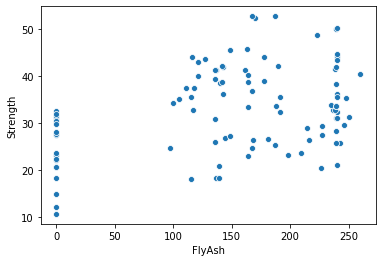

In [6]:
import seaborn as sns
sns.scatterplot(x="FlyAsh", y="Strength", data=con);

## Adding labels
To this point, we have not said much about decorating Seaborn charts with labels and other details.  This is because Seaborn does a pretty good job by default.  But if we do need to clean up our charts a bit, here is the thing to know: the Seaborn chart methods return an object (of type AxesSubplot, whatever that is) for which properties can be set.

Here I assign the results of the `scatterplot()` call to a variable called `ax` and then set various properties of `ax`.  I end the last line of the code block with a semicolon to suppress return values:

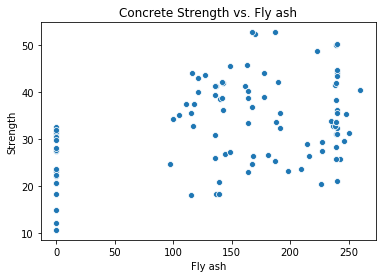

In [7]:
ax = sns.scatterplot(x="FlyAsh", y="Strength", data=con)
ax.set_title("Concrete Strength vs. Fly ash")
ax.set_xlabel("Fly ash");

## Adding a best fit line
As we saw with SAS Enterprise Guide and R, it is sometimes useful to add a best fit line (with confidence intervals around the slope) to a scatterplot.  But let's be clear: this is not one of these situations.  It is obvious from the scatterplot above that the relationship between concrete strength and fly ash is only weakly linear.

The easiest way to "add" a best-fit line to a scatterplot is to use a different plotting method. Seaborn's `lmplot()` method (where "lm" stands for "linear model") is one possibility:

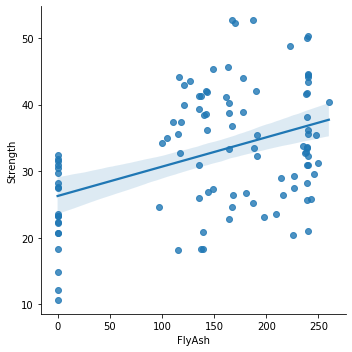

In [8]:
sns.lmplot(x="FlyAsh", y="Strength", data=con);

## Adding color as a third dimension
A graphics "party trick" made fashionable by tools like Tableau is to use color, size, or some other visual cue to add a third dimension to a two-dimensional scatterplot.  In the case of color (or "hue" in Seaborn terminology), this third dimension need to be a non-continuous variable.  This is because the palette of colors available has a finite number of options.

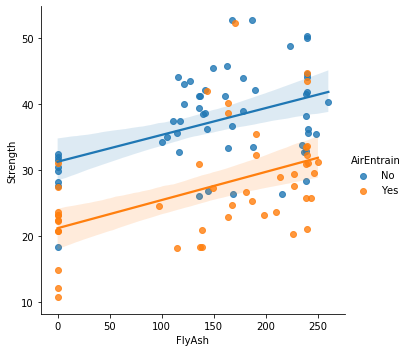

In [9]:
sns.lmplot(x="FlyAsh", y="Strength", hue="AirEntrain", data=con);

## Coefficient of correlation
A correlation coefficient (typically denoted _r_) is a single number that describes the extent of the **linear** relationship between two variables. A value of +1 indicates perfect linearity (the two variables move together, like "height in inches" and "height in centimeters"). A value of _r_ = 0 indicates no correlation (the variables are independent) and _r_ = -1 indicates the variables are inversely correlated (an increase in one variable is associated with a decrease in the other).

Like many other statistics (measures derived from raw data), there are slightly different ways to calculate the correlation coefficient that are more or less sensitive to outliers and other characteristics of the data.  The most common measure is the Pearson correlation coefficient.  The Scipy library provides a method called `pearsonr()` (Pearson's _r_).

In [10]:
from scipy import stats
stats.pearsonr(con['Strength'], con['FlyAsh'])

(0.4063870105954507, 2.0500713273946373e-05)

Again, it is not the prettiest result. But, if we were so inclined, we could write the results to a data frame and apply whatever formatting in Python we wanted to.  In this form, however, we get two numbers:
1. Pearson's _r_ (0,4063---same as we got in Excel, R, etc.)
2. A _p_-value.  This is the probability that the true value of _r_ is zero (no correlation).

We conclude based on this that there is weak linear relationship between concrete strength and fly ash but not so weak that we should conclude the variables are uncorrelated.  In other words, it seems that fly ash does have _some_ influence on concrete strength.

Of course, correlation does not imply causality. It is equally correct, based on the value of _r_, to say that concrete strength has some influence on the amount of fly ash in the mix.  But hopefully we are worldly enough to know _something_ about mixing up a batch of concrete and can generally _infer_ causality, or at least directionality. That is, we use our domain knowledge to help interpret statistical results.

## Corrleation matrix
A correlation matrix is a handy way to calculate the pairwise correlation coefficients between two or more (numeric) variables.  The Pandas data frame has this functionality built-in to its `corr()` method, which I have wrapped inside the `round()` method to keep things tidy.  Notice that every correlation matrix is symmetrical: the correlation of "Cement" with "Slag" is the same as the correlation of "Slag" with "Cement" (-0.24).  Thus, the top (or bottom, depending on your preferences) of every correlation matrix is redundant.  The correlation between each variable and itself is 1.0, hence the diagonal.

In [17]:
cormat = con.corr()
round(cormat,2)

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Strength
No,1.00,-0.03,-0.08,0.34,-0.14,-0.33,0.22,-0.31,0.19
Cement,-0.03,1.00,-0.24,-0.49,0.22,-0.11,-0.31,0.06,0.46
Slag,-0.08,-0.24,1.00,-0.32,-0.03,0.31,-0.22,-0.18,-0.33
FlyAsh,0.34,-0.49,-0.32,1.00,-0.24,-0.14,0.17,-0.28,0.41
Water,-0.14,0.22,-0.03,-0.24,1.00,-0.16,-0.60,0.11,-0.22
SP,-0.33,-0.11,0.31,-0.14,-0.16,1.00,-0.10,0.06,-0.02
CoarseAgg,0.22,-0.31,-0.22,0.17,-0.60,-0.10,1.00,-0.49,-0.15
FineAgg,-0.31,0.06,-0.18,-0.28,0.11,0.06,-0.49,1.00,-0.17
Strength,0.19,0.46,-0.33,0.41,-0.22,-0.02,-0.15,-0.17,1.00


## Correlation matrix to heat map
Python, and its libraries, make lots of things easy.  For example, once the correlation matrix is defined (I assigned to the variable `cormat` above), it can be passed to Seaborn's `heatmap()` method to create a heatmap (or headgrid).  The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right.  Cells that are lighter have higher values of _r_.  This type of visualization can make it much easier to spot linear relationships between variables than a table of numbers. For example, if I focus on the "Strength" column, I immediately see that "Cement" and "FlyAsh" have the largest positive correlations whereas "Slag" has the large negative correlation.

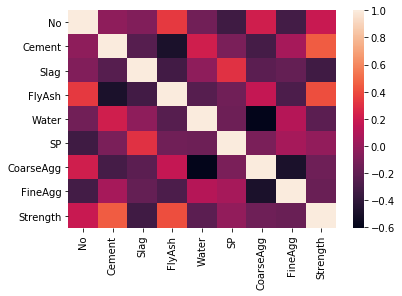

In [19]:
sns.heatmap(cormat);